# LAPTOP PRICE PREDICTION

## Let's Dive into it

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read 'laptop_data_cleaned.csv' dataset and store it inside a variable

In [3]:
df=pd.read_csv('laptop_data_cleaned.csv')

#### Check head

In [7]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


### 

Data Cleaning

In [10]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

#### View info about the dataset


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


#### check number of rows and columns

In [16]:

df.shape

(1273, 13)

#### View basic statistical information about the dataset

In [19]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [21]:
#checking for duplicate values
df[df.duplicated()]

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1004,Toshiba,Notebook,4,1.2,11.061462,0,0,165.632118,Intel Core i5,0,128,Intel,Windows


In [23]:
#removing duplicate values
df.drop_duplicates(keep=False, inplace=True)

In [25]:
df.rename(columns={'Ram': 'Ram(GB)'}, inplace=True)

In [27]:

df.rename(columns={'Weight': 'Weight(Kg)'}, inplace=True)

In [29]:

df.head()

,Company,TypeName,Ram(GB),Weight(Kg),Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


### Data Visualization

#### Displaying the distribution of prices of the laptops

<Axes: xlabel='Price', ylabel='Density'>

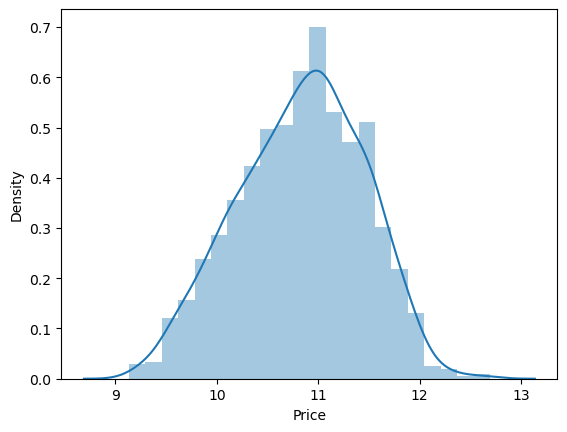

In [33]:
sns.distplot(df['Price'])





Clearly, the distribution of the price is skewed.

#### Comparison of Laptop Prices

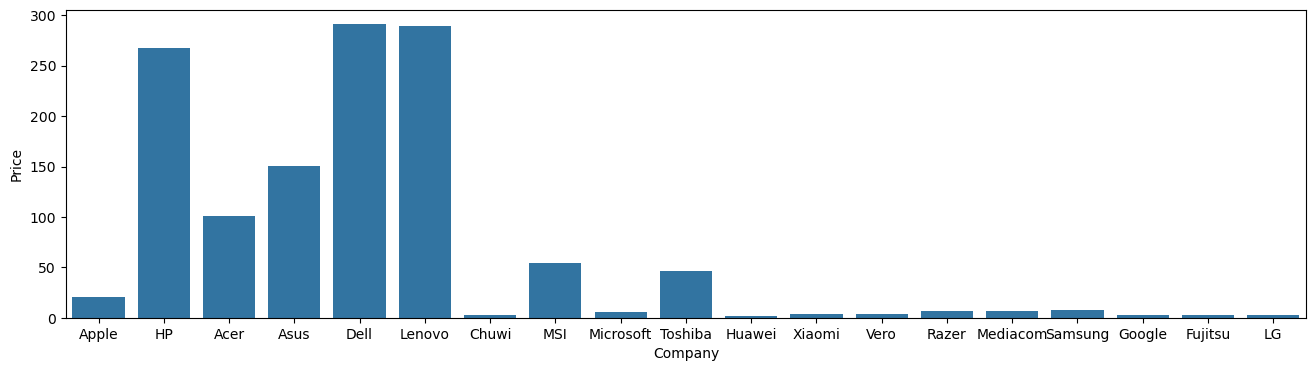

In [37]:
plt.figure(figsize = (16,4))
sns.countplot(data = df, x = 'Company')
plt.ylabel('Price')
plt.show()

Laptops from  Dell, Lenovo and HP tend to command a higher price compared to others, suggesting brand influence on pricing

#### Relationship between RAM Size and Laptop Price

<Axes: xlabel='Ram(GB)', ylabel='Price'>

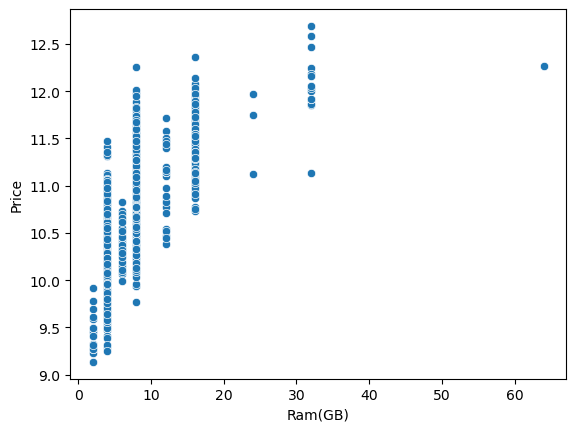

In [41]:
sns.scatterplot(x='Ram(GB)', y='Price', data=df)

As RAM size increases, the price of laptops also tends to increase, indicating a positive correlation between RAM and price

#### Distribution of Touchscreen Laptops

In [45]:
touchscreen_counts = df['TouchScreen'].value_counts()

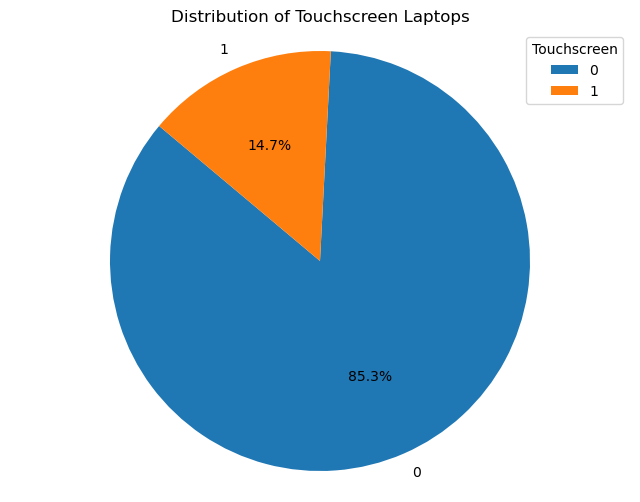

In [47]:

plt.figure(figsize=(8, 6))
plt.pie(touchscreen_counts, labels=touchscreen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Touchscreen Laptops')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(touchscreen_counts.index, title="Touchscreen", loc="best")  # Add a legend
plt.show()


Approximately 85.3% of laptops in the dataset feature touchscreen functionality, indicating a growing trend towards interactive displays."

#### Average Laptop Price by Operating System

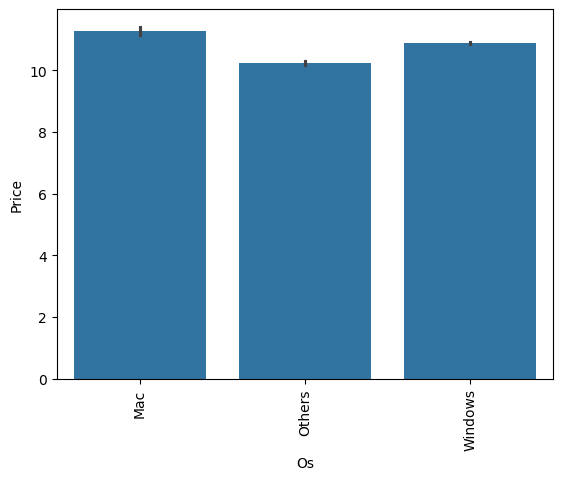

In [51]:
sns.barplot(x=df['Os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

The bar plot of average laptop prices by operating system shows that laptops running macOS (Mac) are generally more expensive compared to those running other operating systems (Others). This indicates a higher price point for Mac laptops in this dataset.

#### Distribution of Laptop Weights


<Axes: xlabel='Weight(Kg)', ylabel='Density'>

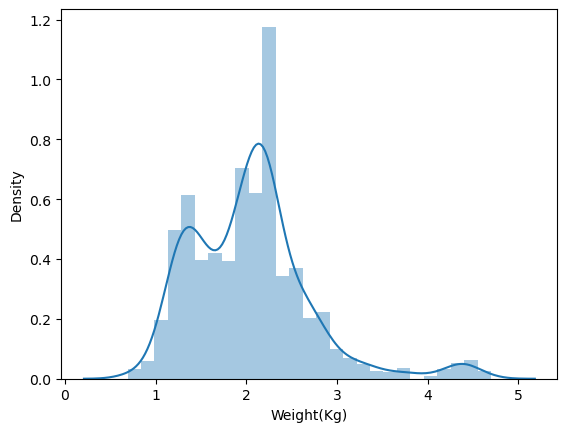

In [55]:
sns.distplot(df['Weight(Kg)'])

The distribution plot of laptop weights shows that the majority of the laptops are clustered around weights of approximately 1.34 to 1.37 kg, with fewer laptops being significantly heavier at around 1.83 to 1.86 kg. This suggests that lighter laptops are more common in this dataset.

#### Distribution of Laptop Weights

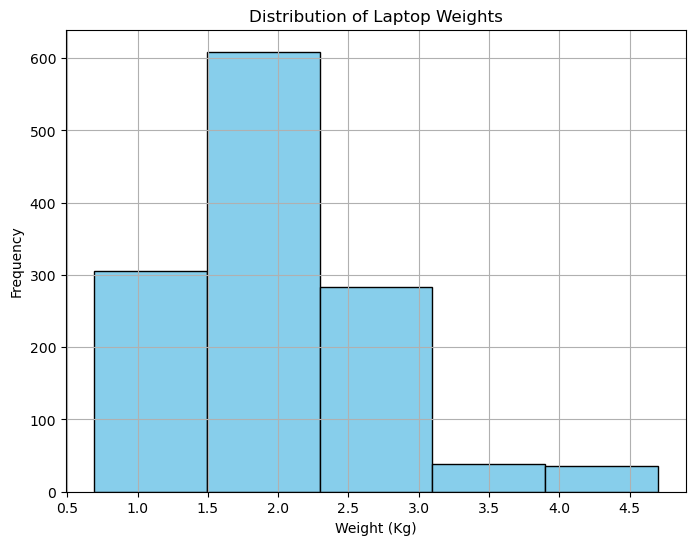

In [59]:

plt.figure(figsize=(8, 6))
plt.hist(df['Weight(Kg)'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Laptop Weights')
plt.xlabel('Weight (Kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




The majority of laptops in the dataset weigh between 0.7Kg-3.1kg , with a few outliers at the heavier end, suggesting a range of portability options for consumers

#### Correlation Heatmap of Laptop Features

<Axes: >

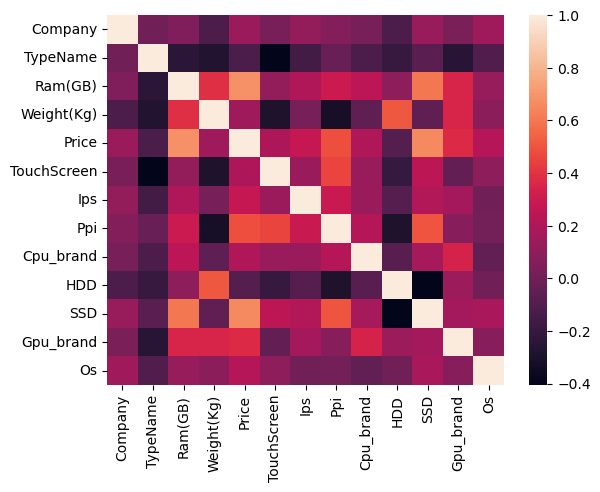

In [109]:
sns.heatmap(df.corr())

The heatmap illustrates the correlation between different features of laptops in the dataset. Key insights include:

- Strong positive correlations between RAM and Price, as well as between SSD storage and Price, indicating that higher RAM and SSD capacities tend to increase laptop prices.
- Moderate positive correlations between IPS (In-Plane Switching) display and PPI (Pixels Per Inch), suggesting that laptops with IPS screens often have higher pixel densities.

This visualization helps identify which features might influence each other and their collective impact on laptop prices.






## Data Preprocessing

In [63]:
df.head()

,Company,TypeName,Ram(GB),Weight(Kg),Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


### Convert the rest of the categorical values into numeric using LabelEncoding and store the results in a old dataframe df

In [66]:
from sklearn.preprocessing import LabelEncoder

In [68]:
a=LabelEncoder()

In [70]:
df['Company']=a.fit_transform(df['Company'])

In [72]:
df['TypeName']=a.fit_transform(df['TypeName'])

In [74]:
df['Cpu_brand']=a.fit_transform(df['Cpu_brand'])

In [76]:
df['Gpu_brand']=a.fit_transform(df['Gpu_brand'])

In [78]:
df['Os']=a.fit_transform(df['Os'])

In [80]:
df.head()

,Company,TypeName,Ram(GB),Weight(Kg),Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,11.175755,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,10.329931,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,11.814476,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,11.473101,0,1,226.983005,2,0,256,1,0


In [82]:
df.columns

Index(['Company', 'TypeName', 'Ram(GB)', 'Weight(Kg)', 'Price', 'TouchScreen',
       'Ips', 'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

#### Split the columns into input and target variables (X and y)

In [85]:

X = df.drop(columns=['Price'])
y = df['Price']

In [87]:
X.head()

,Company,TypeName,Ram(GB),Weight(Kg),TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,0,1,226.983005,2,0,256,1,0


In [89]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

#### Carry out Feature scaling using StandardScaler

In [92]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler=StandardScaler()

In [96]:
x_scaler=scaler.fit_transform(X)

In [98]:
X=pd.DataFrame(x_scaler,columns=X.columns)
X.head()

,Company,TypeName,Ram(GB),Weight(Kg),TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,-1.335637,1.135574,-0.089209,-1.005611,-0.415342,1.603192,1.864618,-0.435879,-0.799939,-0.312688,-0.270173,-4.584399
1,-1.335637,1.135574,-0.089209,-1.050477,-0.415342,-0.623756,-0.448177,-0.435879,-0.799939,-0.998682,-0.270173,-4.584399
2,0.136904,0.333733,-0.089209,-0.272815,-0.415342,-0.623756,-0.132971,-0.435879,-0.799939,0.373306,-0.270173,-2.102810
3,-1.335637,1.135574,1.480121,-0.317680,-0.415342,1.603192,1.714437,0.584383,-0.799939,1.745294,-1.816971,-4.584399
4,-1.335637,1.135574,-0.089209,-1.005611,-0.415342,1.603192,1.864618,-0.435879,-0.799939,0.373306,-0.270173,-4.584399


#### Split the dataset into training and testing set

In [101]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

### Machine Learning Models

#### Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict on the test set
y_pred = model.predict(X_test)
print('Predicted values (y_pred):', y_pred) 

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Coefficients: [ 0.03382401  0.04138846  0.21779438  0.03125312  0.00801485  0.03773547
  0.1308287  -0.01670904  0.00843727  0.17929758  0.0978921   0.05914357]
Intercept: 10.826507031135893
Predicted values (y_pred): [10.1133436  10.87515507 10.86927075 11.39967776 10.08948661 10.91770865
 11.39873299 10.55027036 11.16293478 10.22622448 10.32914655 10.93095582
 10.17129495 10.71430358 11.23172607 11.7899848  10.82620605 10.40991249
 11.46510055 10.5019523  10.73029107 10.60644731 10.50909947 11.95290914
 11.29241518 10.28018708 10.95442363 10.46119171 10.82719098 10.79150029
 10.72845136 10.37010992 10.16525637 10.81311909 10.70989171 10.6994747
 11.6686464  11.54047758 10.67478666 10.80445998 10.08739336 11.23125868
 10.63772726 10.5790225  10.99613488 11.34289346 11.01504674 10.20027189
 10.84857831 10.99830644 10.64758683 10.25373217 10.46518086 10.8675659
 10.96227043 10.30415592 10.71863775  9.99722343 10.07192119 10.55027036
 11.54207885 10.79555951 10.88162198 10.26398201 10.22

In [113]:
c=[i for i in range(191)]
len(c)

191

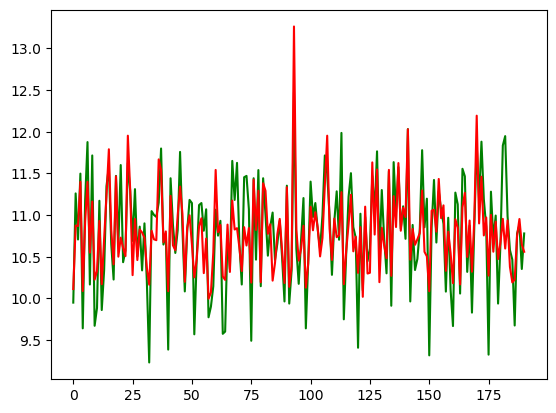

In [115]:
# plt.scatter(y_test,y_pred)
# len(y_pred)
plt.plot(c,y_test,"green")#actual values
plt.plot(c,y_pred,'red')#predicted values
plt.show()

The alignment between the red (predicted) and green (actual) lines indicates the model's ability to approximate the true values.
Overall, the close alignment between the predicted and actual values suggests that the model performs well in capturing the underlying patterns and trends in the data.

#### Ridge Regression

In [122]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create and fit the model with hyperparameter tuning
ridge = Ridge()
parameters = {'alpha': [0.1, 1, 10]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

print("Best alpha:", ridge_regressor.best_params_)

# Predict on the test set
y_pred = ridge_regressor.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Best alpha: {'alpha': 10}
R-squared Score: 0.671786004359015
Mean Squared Error: 0.132673800236857
Mean Absolute Error: 0.2795254434043059
Root Mean Squared Error: 0.36424414921431064


#### Random Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor


# Fit the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R-squared Score: 0.9066166251091478
Mean Squared Error: 0.03774832088289335
Mean Absolute Error: 0.15275713908032876
Root Mean Squared Error: 0.19428927114715663


#### Support Vector Machine

In [126]:
from sklearn.svm import SVR

# Create and fit the model
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_regressor.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


R-squared Score: 0.8936470510369804
Mean Squared Error: 0.042991006150617454
Mean Absolute Error: 0.15454138302297304
Root Mean Squared Error: 0.2073427263026544


#### AdaBoost Regression

In [128]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the base model for AdaBoost
base_model = DecisionTreeRegressor(max_depth=4)

# Initialize AdaBoost Regressor
ada_regressor = AdaBoostRegressor(base_model, n_estimators=50, random_state=42)

# Create and fit the model
ada_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_regressor.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R-squared Score: 0.8400985625542385
Mean Squared Error: 0.06463688828331032
Mean Absolute Error: 0.20213231060149278
Root Mean Squared Error: 0.25423785769100227


In [147]:
# Create a DataFrame with two columns
data = {
    'Algorithm': ['Linear Regression', 'Rigde Regression', 'Random Forest Regression', 'Support Vector Regression','AdaBoostRegressor'],
    'R2 Score': ['0.672', '0.671', ' 0.906', '0.893','0.840']
}

df1 = pd.DataFrame(data)

# Display the DataFrame
print(df1)

                   Algorithm R2 Score
0          Linear Regression    0.672
1           Rigde Regression    0.671
2   Random Forest Regression    0.906
3  Support Vector Regression    0.893
4          AdaBoostRegressor    0.840


Clearly in this dataset, Random Forest Regression (RFR) consistently exhibits superior performance, likely attributed to its capability to effectively capture intricate patterns in the data while mitigating overfitting, resulting in higher predictive accuracy and generalization